# Regresión Lineal

El dataset a utilizar es **"*precios_mercadocentral*".**

El objetivo del análisis y aplicación del modelo es predecir el **costo de un item a futuro.**

Para ello utilizare un modelo de regresión lineal, utilizando como variable independiente la fecha y como dependiente el costo en dicha fecha.

 Veremos si el modelo encuentra relación entre las dos variables para ajustar a unaa ecuación lineal que nos proveea información a futuro del costo del item.
 Para de esta manera poder determinar si es un item a comprar o esperar a que baje el costo para comprarlo.


## Carga y limpieza de datos

In [18]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [19]:
#Load csv
url = 'precios-mercadocentral.csv'
df = pd.read_csv(url, index_col=0, encoding='latin-1')

In [20]:
#Dataframe descriotion
print('Descripción del dataframe a implementar el modelo:')
df.head()
df.info()

Descripción del dataframe a implementar el modelo:
<class 'pandas.core.frame.DataFrame'>
Index: 828 entries, 32 to 32
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pais           828 non-null    object 
 1   mercado        828 non-null    object 
 2   año            828 non-null    int64  
 3   mes            828 non-null    object 
 4   producto       828 non-null    object 
 5   variedad       828 non-null    object 
 6   origen         828 non-null    object 
 7   precio_usd_kg  767 non-null    float64
 8   moneda_cod     828 non-null    object 
 9   moneda         828 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 71.2+ KB


In [21]:
#View null records in the dataframe
nulos = df.isnull().sum()
print(f'Registros nulos del dataframe: \n {nulos}')

Registros nulos del dataframe: 
 pais              0
mercado           0
año               0
mes               0
producto          0
variedad          0
origen            0
precio_usd_kg    61
moneda_cod        0
moneda            0
dtype: int64


Eliminamos las filas que contienen valores nulos en la columna <i>"precio_usd_kg"</i>, ya que es el dato principal que utilizaremos para nuestro modelo.

In [22]:
#Drop null and NaN
df.dropna(axis=0, subset=['precio_usd_kg'], inplace=True)

## Preprocesamiento de los datos

In [23]:
#Lower column producto
df['producto'] = df['producto'].str.lower()

#Choice product for the prediction model
prod_index = df['producto'].unique()
product = 'ajo'
print(f'De esa lista de productos: \n {prod_index} \n \n Vamos a implementar el modelo para el producto {product.upper()}.')

De esa lista de productos: 
 ['anana' 'banana' 'pomelo' 'limón' 'manzana' 'mandarina' 'melón' 'naranja'
 'pera' 'uva' 'cereza' 'ciruela' 'durazno' 'frutilla' 'kiwi' 'acelga'
 'ajo' 'albahaca' 'apio' 'arveja' 'batata' 'berenjena' 'brocoli' 'cebolla'
 'chaucha' 'choclo' 'epinaca' 'lechuga' 'papa' 'pepino' 'perejil'
 'pimiento' 'radicheta' 'remolacha' 'repollo' 'tomate' 'zanahoria'
 'zapallito' 'zapallo' 'frambuesa' 'palta'] 
 
 Vamos a implementar el modelo para el producto AJO.


In [24]:
#Filter dataframe
df_prod = df[(df['producto'])==product].filter(items=['año','mes','producto','precio_usd_kg'])

In [25]:
#Map month from string to float
df_prod['mes'] = df_prod['mes'].map({"Enero":0.077,"Febrero":0.154, "Marzo":0.231, "Abril":0.308, "Mayo":0.385, "Junio":0.462, "Julio":0.539, "Agosto":0.616 , "Septiembre":0.693, "Octubre":0.77, "Noviembre":0.847, "Diciembre":0.924})

#Sum column año and mes for use to variable x
df_prod['fecha'] = (df_prod['año']+df_prod['mes'])

## Modelo

In [26]:
#Assign variables for the model
x = df_prod.filter(items=['fecha']).values
y = df_prod.filter(items=['precio_usd_kg']).values

#Split on training and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Linear Regression model creation
modelo = LinearRegression()

#Training
modelo.fit(x_train,y_train)

#Prediction
y_predic = modelo.predict(x_test)

## Metricas de evaluación

In [27]:
#Metrics
correlation = np.corrcoef(x_test.ravel(),y_test.ravel())[0, 1]
mse = mean_squared_error(y_test, y_predic)
r2 = r2_score(y_test,y_predic)
print(f'Metricas del modelo de regresión lineal para el producto {product.upper()}:')
print(f'Coeficiente: {modelo.coef_[0][0]:.3f}')
print(f'Intercepto {modelo.intercept_[0]:.3f}')
print(f'Correlacióne entre las variables fecha y precio:  {correlation:.3f}')
print(f'Error cuadratico medio: {mse:.3f}')
print(f'Coeficiente de determinación (r^2): {r2:.3f}')

Metricas del modelo de regresión lineal para el producto AJO:
Coeficiente: -1.722
Intercepto 3476.441
Correlacióne entre las variables fecha y precio:  -0.992
Error cuadratico medio: 0.106
Coeficiente de determinación (r^2): 0.756


## Gráficos

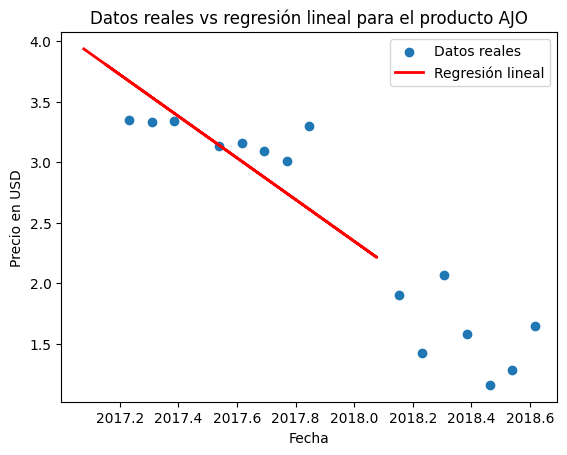

In [28]:
#Graphics
plt.scatter(x_train, y_train, label='Datos reales')
plt.plot(x_test, y_predic, color='red', linewidth=2, label='Regresión lineal')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Precio en USD')
plt.title(f'Datos reales vs regresión lineal para el producto {product.upper()}')
plt.show()

In [29]:
#Predecimos el costo a futuro del item
def predict_model(x):
  depend = modelo.coef_ * x + modelo.intercept_
  return depend

print(f'El precio del {product} para la fecha de abril de 2019 es: {predict_model(2019.0308)[0][0]:.3f} USD')

print(f'El precio del {product} para la fecha de agosto de 2020 es: {predict_model(2020.0616)[0][0]:.3f} USD')

El precio del ajo para la fecha de abril de 2019 es: 0.572 USD
El precio del ajo para la fecha de agosto de 2020 es: -1.203 USD


## Analisis de los resultados

Utilizaremos las métricas del modelo para analizarlas y realizar una conclusión.

<b>Metricas del modelo:</b>

<table>
    <tr>
        <td>Metrica</td>
        <td>Valor</td>
    </tr>
    <tr>
        <td>Coeficiente</td>
        <td>-1.722</td>
    </tr>
    <tr>
        <td>Intercepto</td>
        <td> 3476.441 </td>
    </tr>
    <tr>
        <td>Correlacióne entre las variables fecha y precio</td>
        <td>-0.992</td>
    </tr>
    <tr>
        <td>Error cuadratico medio</td>
        <td>0.106</td>
    </tr>
    <tr>
        <td>Coeficiente de determinación ($r^2$)</td>
        <td>0.756</td>
    </tr>
</table>

<ul>
    <li> <b>Coeficiente:<b> vemos que tiene valor negativo, lo que indica que la "tendencia" del costo del producto es ir bajando a medida que pasa el tiempo, es decir, valdra cada vez menos.</li>
    <li> <b>Correlación:<b> en este caso, el valor que obtenemos es cercano a 1 (<i>tomamos el valor absoluto</i>), lo que indica que existe correlación entre nuestras variables utilizadas (fecha y precio_usd_kg)</li>
    <li> <b>Error cuadratico medio:<b> aunque en el gráfico vemos que los datos se encuentran alejados de la recta de regresión lineal (lo que indica que el modelo tiene errores), el valor que obtenemos del error cuadratico medio nos indica que el promedio de errores es pequeño.</li>
    <li> <b>Coeficiente de determinación ($r^2$)<b>: en este caso, nuestro valor se encuentra en el medio entre 0.5 y 1. Lo que nos indica que nuestro modelo se ajusta a los datos, aunque no del todo, ya que deberia estar un poco mas cercano al 1, por lo que es probables que posea limitaciones para realizar predicciones (las realice correctamente hasta cierta fecha), o que no indique correctamente los precios en ciertas fechas.</li>
</ul>

También, utilizamos el modelo para realizar la prediccion del costo en dos fechas futuras distintas, y obtuvimos:

<ul>
    <li> El precio del ajo para la fecha de abril de 2019 es: 0.572 USD </li>
    <li> El precio del ajo para la fecha de agosto de 2020 es: -1.203 USD </li>
</ul>


## Conclusión

Efectivamente vemos que nuestro modelo predice que el costo sigue bajando., como indica el coeficiente que obtuvimos.

En base a este coeficiente, notamos la limitación de este modelo, que radica principalmente en que no podemos tener precios negativos de productos, como nos indica para agosto de 2020, ya que un producto con precio negaivo directamente no se comercializaria.

Por lo tanto, el modelo de regresión lineal aplicado al dataset, aunque se aplique correctamente, con metricas que lo avalan, no es una buena opción para realizar predicciones, ya que terminariamos con precios negativos.

Para mejorar este analisis, deberiamos tener datos de mas fechas, es decir, que el rango de fechas a utilizar para el modelo sea mas amplio, para así ver las fluctuaciones del precio, que baje y suban, para realizar una mejor regresión u optar por otro metodo que logre predicciones mas adecuadas.


